#### checking total percentage of missing values of full dataset after dropping columns with more than 70%-80% of missing values


##### Sensor components Failure prediction

#### ) Problem statement.
Data: Sensor Data

Problem statement :

The system in focus is the Air Pressure system (APS) which generates pressurized air that are utilized in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.

The problem is to reduce the cost due to unnecessary repairs. So it is required to minimize the false predictions.

True class	Positive	Negative	
Predicted class			
Positive	-	cost_1	
Negative	cost_2		
Cost 1 = 10 and Cost 2 = 500

The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.

Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.

From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer,LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,\
    recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
# from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline



In [2]:
#LOAD CSV FILE  
df=pd.read_csv('C:/ineuron/fault detection/aps_failure_training_set1.csv',na_values="na")

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [4]:
#check rows and columns of the dataset
df.shape

(36188, 171)

In [5]:
#check unique values of target variable
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [6]:
#null_report=df.isna().sum()/df.shape[0]
null_report=df.isna().sum()/df.shape[0]
for column, missing_percentage in null_report.items():
    missing_percentage=round(missing_percentage,2)
    if missing_percentage>0.70:
        print(column,missing_percentage)
    #print(f"{column}: {missing_percentage:.2%}")

ab_000 0.77
bn_000 0.73
bo_000 0.77
bp_000 0.79
bq_000 0.81
br_000 0.81
cr_000 0.77


In [7]:
#define numerical & catergorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']


In [8]:
#print columns
print(f'We have {len(numeric_features)} numerical features:{numeric_features}')
print(f'We have {len(categorical_feature)} categorical feature:{categorical_feature}')

We have 170 numerical features:['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 

##### As this is a sensor data Interpretation of the data is not required

#### Checking missing values

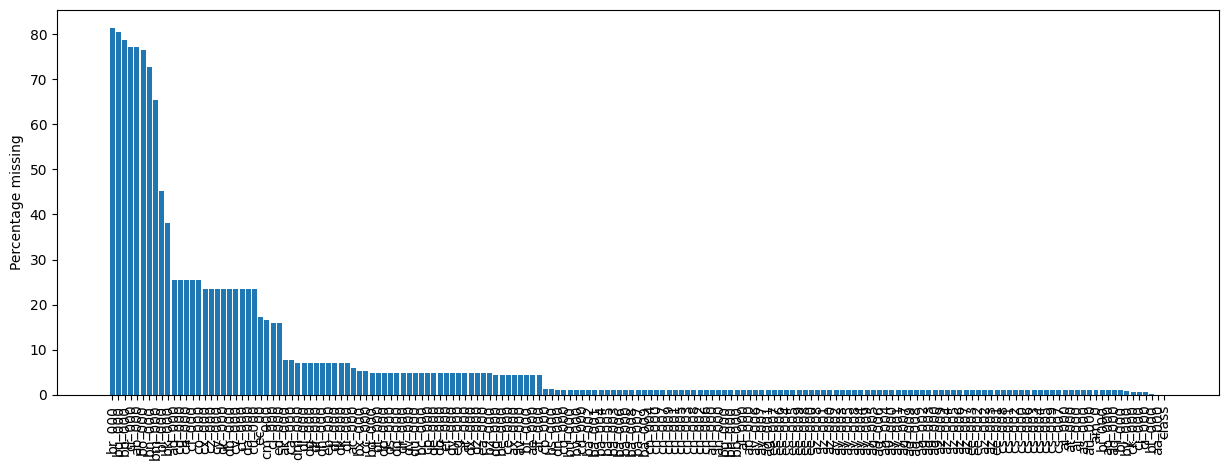

In [9]:
# plotting missing values count for each column

import matplotlib.pyplot as plt
# fig,ax=plt.subplot(figsize=(15,5))
fig, ax = plt.subplots(figsize=(15, 5))
missing=df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)

ax.bar(missing.index,missing.values.T[0])
plt.xticks(rotation=90)
plt.ylabel("Percentage missing")
plt.show()

In [10]:
#dropping columns which has more than 70% of missing values
dropcols=missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
cr_000,77.086327
ab_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [11]:
#before droping  the columns count
df.shape

(36188, 171)

In [12]:
#after deleting the columns count
df.drop(list(dropcols.index),axis=1,inplace=True)
df.shape

(36188, 164)

In [13]:
missing_values_count=df.isnull().sum()
total_cell=np.prod(df.shape)
total_missing=missing_values_count.sum()

print(f"Percentage of total missing cells in the data {(total_missing/total_cell)*100}%")

Percentage of total missing cells in the data 5.37059852747306%


Positive:1000,Negative: 35188


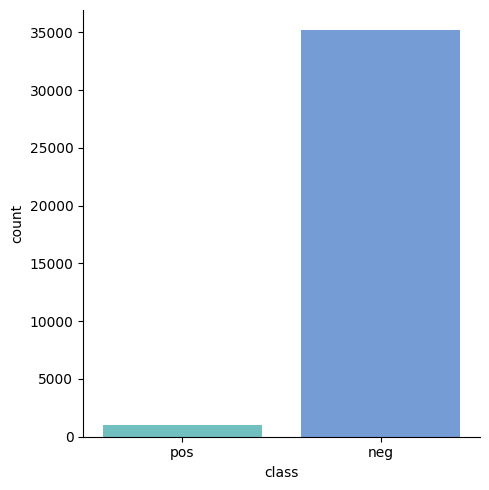

In [15]:
pos=df[df['class']=='pos'].shape[0]
neg=df[df['class']=='neg'].shape[0]
print("Positive:"+str(pos)+",Negative: "+str(neg))
sns.catplot(data=df,x="class",kind="count",palette="winter_r",alpha=0.6)
plt.show()

###### Report

###### The target classes are highly imbalanced
###### Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
###### If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
###### Hence we should handle imbalanced data with certain methods.
###### How to handle Imbalance Data ?

###### Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
###### SMOTE: Synthetic Minority Oversampling Technique
###### SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
###### Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
###### It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [16]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [33]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(tn,fp,fn,tp)
    cost = 10*fp + 500*fn
    return cost

In [18]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [19]:
# Splitting X and y for all Experiments
X= df.drop('class', axis=1)
y = df['class']

In [20]:
y= y.replace({'pos': 1, 'neg': 0})

In [21]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [22]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7152)
n_neighbors= 3 || accuracy (0.7097)
n_neighbors= 5 || accuracy (0.6927)
n_neighbors= 7 || accuracy (0.7098)
n_neighbors= 9 || accuracy (0.6870)


In [26]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [27]:
X_knn =knn_pipeline.fit_transform(X)

In [28]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [31]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     #"CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [34]:
report_knn = evaluate_models(X_res, y_res, models)

28055 0 0 28069
6949 74 23 6986
Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9931
- F1 score: 0.9931
- Precision: 0.9895
- Recall: 0.9967
- Roc Auc Score: 0.9931
- COST: 12240.


28055 0 0 28069
6896 127 49 6960
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9875
- F1 score: 0.9875
- Precision: 0.9821
- Recall: 0.9930
- Roc Auc Score: 0.9875
- COST: 25770.


27494 561 389 27680
6887 136 95 6914
Gradient Boosting
Model performance for Training set
- Accuracy: 0.9831
- F1 score: 0.9831
- Precision: 0.9801
- Recall: 0.9861
- Roc Auc Score: 0.9831
- COST: 200110.
----------------------------------
Model perform

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
cost_list=[]
models_list = []
accuracy_list = []
    
for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

28134 0 0 816
7036 18 48 136
Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9909
- F1 score: 0.8047
- Precision: 0.8831
- Recall: 0.7391
- Roc Auc Score: 0.8683
- COST: 24180.


28134 0 1 815
7014 40 54 130
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 0.9994
- Precision: 1.0000
- Recall: 0.9988
- Roc Auc Score: 0.9994
- COST: 500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9870
- F1 score: 0.7345
- Precision: 0.7647
- Recall: 0.7065
- Roc Auc Score: 0.8504
- COST: 27400.




ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values